# Challenge Set 7
## Hasan Haq

Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

**Challenge 1**

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [3]:
df_votes = pd.read_csv('data/house-votes-84.data')

In [4]:
df_votes.replace({'y':1, 'n':0, '?':np.nan}, inplace=True)
df_votes.fillna(df_votes.mean(), inplace=True)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812121
1,democrat,0.443128,1.000000,1.000000,0.416076,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
2,democrat,0.000000,1.000000,1.000000,0.000000,0.50358,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
3,democrat,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.421836,1.000000,1.000000,1.000000,1.000000
4,democrat,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
5,democrat,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508557,1.000000,1.000000,1.000000
6,republican,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.428571,1.000000
7,republican,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
8,democrat,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.812121
9,republican,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362319,0.421836,1.000000,1.000000,0.000000,0.000000


**Challenge 2**

Split the data into a test and training set. Use this function:

from sklearn.cross_validation import train_test_split

In [5]:
y = df_votes['republican']
X = df_votes.drop(['republican'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

**Challenge 3**

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

from sklearn.neighbors import KNeighborsClassifier
Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

from sklearn.metrics import accuracy_score
Which k value gives the highest accuracy?

In [7]:
for i in list(range(1,21)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(i, " ", accuracy_score(y_test, y_pred))

1   0.908396946565
2   0.908396946565
3   0.908396946565
4   0.916030534351
5   0.923664122137
6   0.908396946565
7   0.916030534351
8   0.916030534351
9   0.923664122137
10   0.908396946565
11   0.923664122137
12   0.931297709924
13   0.931297709924
14   0.916030534351
15   0.916030534351
16   0.916030534351
17   0.916030534351
18   0.908396946565
19   0.916030534351
20   0.900763358779


k = 12,13 give us the highest accuracy

**Challenge 4**

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [21]:
logreg = LogisticRegression()
log_acc = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()
print(log_acc)

//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:978: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['democrat', 'republican'], 
      dtype='<U10')

**Challenge 5**

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

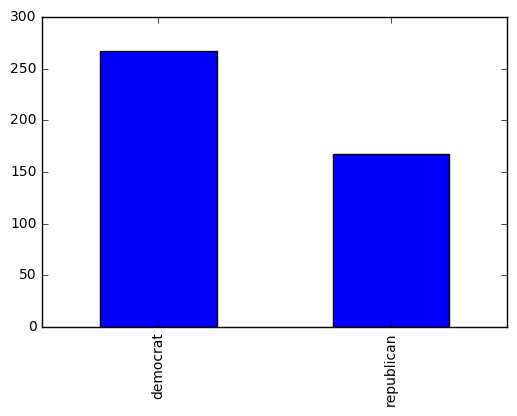

In [8]:
y.value_counts().plot(kind='bar');

In [9]:
def dem_pred(n):
    """Predict democrats with 'n' samples"""
    np.random.seed(444)
    x_inp = np.array(np.random.randint(0, 2, (n,len(X.columns))))
    y_act = ['democrat' for x in list(range(x_inp.shape[0]))]
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X, y)
    y_pred = knn.predict(x_inp)
    return accuracy_score(y_act, y_pred)

In [10]:
def rep_pred(n):
    """Predict democrats with 'n' samples"""
    np.random.seed(444)
    x_inp = np.array(np.random.randint(0, 2, (n,len(X.columns))))
    y_act = ['republican' for x in list(range(x_inp.shape[0]))]
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X, y)
    y_pred = knn.predict(x_inp)
    return accuracy_score(y_act, y_pred)

In [11]:
def votes_pred(k):
    "Prediction accuracy with 'k' nearest neighbors"
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

**Challenge 6**

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

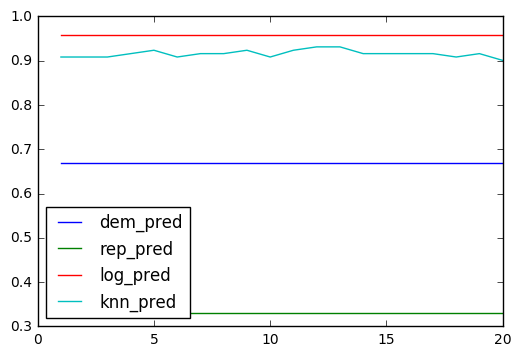

In [12]:
plt.plot(list(range(1,21)), [dem_pred(100) for i in list(range(1,21))], label="dem_pred")
plt.plot(list(range(1,21)), [rep_pred(100) for i in list(range(1,21))], label="rep_pred")
plt.plot(list(range(1,21)), [log_acc for i in list(range(1,21))], label="log_pred")
plt.plot(list(range(1,21)), [votes_pred(i) for i in list(range(1,21))], label="knn_pred")
plt.legend(loc=0)
plt.show()

**Challenge 7**

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

from sklearn.learning_curve import learning_curve
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [15]:
curv = learning_curve(logreg, X, y)

In [42]:
# Plot it
train_cv_err = np.mean(curv[1], axis=1)
test_cv_err = np.mean(curv[2], axis=1)

In [14]:
learning_curve(logreg, X, y)

(array([ 28,  93, 158, 223, 289]),
 array([[ 1.        ,  0.96428571,  0.96428571],
        [ 0.97849462,  0.97849462,  0.97849462],
        [ 0.98101266,  0.97468354,  0.98101266],
        [ 0.98206278,  0.97309417,  0.98206278],
        [ 0.96885813,  0.96539792,  0.97231834]]),
 array([[ 0.96551724,  0.89655172,  0.88888889],
        [ 0.97241379,  0.91724138,  0.89583333],
        [ 0.97241379,  0.93103448,  0.91666667],
        [ 0.97241379,  0.95172414,  0.93055556],
        [ 0.97931034,  0.96551724,  0.94444444]]))

**Challenge 8**

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

```
from sklearn.naive_bayes import GaussianNB
```

SVM (Support Vector Machine) Classifier

```
from sklearn.svm import SVC
```

Decision Tree

```
from sklearn.tree import DecisionTreeClassifier
```

Random Forest

```
from sklearn.ensemble import RandomForestClassifier
```

In [55]:
# Gaussian Naive Bayes

gauss = GaussianNB()
gauss.fit(X_train,y_train)
y_pred_gauss = gauss.predict(X_test)
accuracy_score(y_test, y_pred_gauss)

0.90839694656488545

In [62]:
cross_val_score(gauss, X, y, cv=10, scoring='accuracy').mean()

0.93971861471861473

In [57]:
# SVM Classifier

svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.95419847328244278

In [63]:
cross_val_score(svm, X, y, cv=10, scoring='accuracy').mean()

0.95822510822510831

In [58]:
# Decision Tree

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
accuracy_score(y_test, y_pred_tree)

0.92366412213740456

In [64]:
cross_val_score(tree, X, y, cv=10, scoring='accuracy').mean()

0.93733766233766236

In [59]:
# Random Forests

forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred_for = forest.predict(X_test)
accuracy_score(y_test, y_pred_for)

0.93129770992366412

In [65]:
cross_val_score(forest, X, y, cv=10, scoring='accuracy').mean()

0.9510822510822512

**Challenge 9**

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```
from sklearn.cross_validation import cross_val_score
```

Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

**See above**

**Challenge 10**

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [69]:
df_votes_2 = pd.read_csv('data/house-votes-84.data')

In [73]:
df_votes_2.replace({'y':1, 'n':0, '?':np.nan}, inplace=True)
df_votes_2.fillna(df_votes.mode(), inplace=True)